<h2> Liora Wachsstock ML Project 5 - Bias and Variance </h2>

a) Give the analytic expression for the average function $ \bar{g}(x) $


The average function $\bar{g}(x)$ denotes $\mathbf{E}_{D}[g^{(D)}(x)]$.

Since H consists of the functions in the form h(x) = ax + b, we choose the line that passes through the two data points 
$(x_{1}, x_{1}^2)$ and $(x_{2}, x_{1}^2)$.

The Equation of a line that passes through a point is $ y - y_{1} = m(x - x_{1})$
where m is the slope of the line. We can find the slope from two the points:

m = $(\frac{x_{2}^2-x_{1}^2}{x_{2}-x_{1}})$
$ = x_{1} + x_{2} $

$ \hat{y} - x_{1}^2  = (x_{1} + x_{2})(x - x_{1})$

$ \hat{y} = (x_{1} + x_{2})(x - x_{1}) + x_{1}^2 $

$         = x_{1}x - x_{1}^2 + x_{2}x - x_{2}x_{1} + x_{1}^2 $

$         = x_{1}x + x_{2}x - x_{2}x_{1} $

$         = (x_{1}+ x_{2})x - x_{2}x_{1} $

So based on that line, we can find $\bar{g}(x)$:

$ \bar{g}(x) = \mathbf{E}_{D}[ (x_{1}+ x_{2})x - x_{2}x_{1}] $

$= \mathbf{E}_{x_{1}, x_{2}}[(x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]*p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}] \,dx_{2}dx_{1}} $

$=0$





<h3>____________________________________________________________________</h3>
</br>
b) Describe an experiment that you could run to determine (numerically) $\bar{g}(x) $, $\mathbf{E}[E_{out}] $, bias, and var.

We can genarate a set of 100 datasets of the form $[[x_{1},x_{1}^2], [x_{2}, x_{2}^2]]$, where $x_{1}$ and $x_{2}$ are uniformly distributed over the interval $[-1, 1]$. Then we can find the average slope and the average intercept for each of those lines, which would give us the slope and intercept for $\bar{g}(x) $. We could use all of the slopes and intercepts from each of the lines, and the average slope and intercept of the lines, to find the var, and the average slope and intercept to find the bias. Eout could be found by the square of the difference between $\bar{g}(x) $ and f(x). 

<h3>____________________________________________________________________</h3>
</br>
C) Run Experiment and report the results. Compare $\mathbf{E}[E_{out}] $ with bias + var. Provide a plot of $\bar{g}(x) $ and f(x) (on the same plot).


In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#The given function
def function(x):
    return np.square(x)

#Plot a line from slope and intercept
def abline(slope, intercept, label= ''):
    #based on https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-g', label = label)

#generate data with uniform random distribution on [-1, 1]
def generate_data(num_datasets, seed_num):
    rng = np.random.default_rng(seed = seed_num)
    size = (num_datasets, 2)
    
    x = rng.uniform(size=size) * rng.choice([-1,1], size)
    
    f = np.vectorize(function) #creating f(X)
    y = f(x)
    
    data = np.stack((x,y), axis=-1) #data is an array of data sets (size size.shape[0]) that look like [[x1,x1^2], [x2, x2^2]]
    
    return x, y, data


First Ten Datasets:
[[[ 0.57313066  0.32847875]
  [-0.52849115  0.27930289]]

 [[-0.76365024  0.58316169]
  [ 0.81169277  0.65884515]]

 [[ 0.51022886  0.26033348]
  [-0.77933967  0.60737032]]

 [[ 0.7961133   0.63379639]
  [ 0.594755    0.35373352]]

 [[-0.40857805  0.16693602]
  [-0.67127644  0.45061206]]

 [[ 0.62746783  0.39371588]
  [ 0.84008236  0.70573836]]

 [[ 0.72416349  0.52441276]
  [-0.52901841  0.27986048]]

 [[-0.96406592  0.9294231 ]
  [ 0.46875421  0.21973051]]

 [[-0.81110597  0.65789289]
  [-0.86527687  0.74870406]]

 [[-0.62984293  0.39670212]
  [-0.04691164  0.0022007 ]]]


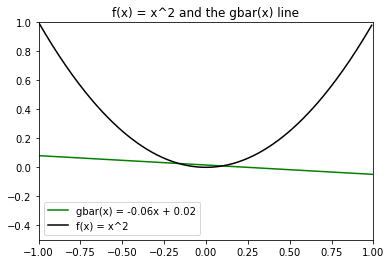

In [3]:
#global variables
plt_start = -1
plt_stop = 1
seed = 45
num_datasets = 100

#set up
fig, ax = plt.subplots()
plt.xlim([plt_start,plt_stop])
plt.ylim([plt_start + 0.5,plt_stop])

#Generate data
x, y, data = generate_data(num_datasets, seed)

print("First Ten Datasets:") #for example
print(data[:10])

#calculate slopes and intercepts
slopes = (y.T[1] - y.T[0]) / (x.T[1] - x.T[0])
intercepts = slopes * (-x.T[0]) + y.T[0]

#plot gbar(x)
gbar = f'gbar(x) = {round(slopes.mean(),2)}x + {round(intercepts.mean(),2)}'
abline(slopes.mean(), intercepts.mean(), label=gbar)

#plot f(x)
f = np.vectorize(function)
xvals = np.arange(plt_start,plt_stop, 0.01)
ax.plot(xvals, f(xvals), 'k',label="f(x) = x^2")

#show plot
ax.legend()
plt.title("f(x) = x^2 and the gbar(x) line")
plt.show()

In [4]:
def eouts(x, slopes, intercepts):
    return np.square((x*slopes + intercepts) - np.square(x))

def bias(x, gslope, gintercept):
    return np.mean(np.square(((gslope*x) + gintercept) - np.square(x)))

def var(x, slopes, intercepts):
    return np.mean(np.square((slopes*x) - intercepts +  slopes.mean()*x - intercepts.mean()))

test_data = generate_data(num_datasets, 42)[0].flatten()[:100]

eout_ = eouts(test_data, slopes, intercepts)
bias_ =  bias(test_data, slopes.mean(), intercepts.mean())
var_ = var(test_data, slopes, intercepts)

print(gbar)
print("bias:", bias_)
print("var:", var_)
print("\nEout:", eout_.mean())
print("vs")
print("bias + var:"  , bias_ + var_)

gbar(x) = -0.06x + 0.02
bias: 0.1592275208132641
var: 0.29298325153537497

Eout: 0.4538988208725074
vs
bias + var: 0.45221077234863905


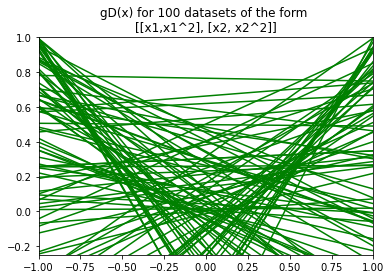

In [5]:
#Not required for the problem, but I found it fascinating that plotting all the gD(x) lines started to form the shape of f(x)
plt.subplot()
plt.xlim([plt_start, plt_stop]) #set x limits to [-1,-1]
plt.ylim([plt_start + 0.75,plt_stop])

plot_lines = np.vectorize(abline)

#all gD(x)
plot_lines(slopes, intercepts) #plot all the lines

plt.title("gD(x) for 100 datasets of the form \n[[x1,x1^2], [x2, x2^2]]")
plt.show()

<h3>____________________________________________________________________</h3>
</br>
D) Compute analytically what $\mathbf{E}[E_{out}] $, bias, and var should be. 

Bias = $E_{x}[(E_{D}[g^{(D)}(x)]- f(x))^{2}]$

$ = E_{x}[(x^2)^2]$

$ = E_{x}[x^4]$

$= {\displaystyle\int_{x_{2} = -1}^{+1} [x^4]*p(x) \,dx} $

$p(x) = \frac{1}{2}$

$= {\displaystyle \frac{1}{2}\int_{-1}^{+1} [x^4]\,dx} $

$= {\displaystyle \frac{1}{2}\int_{-1}^{+1} [x^4]\,dx} $

$ = \frac{1}{2} * \frac{2}{5} $

$ = \frac{1}{5} $

___________________________________________________________________________________________________________________________

Var =  $\mathbf{E}_{x}[\mathbf{E}_{D}[(g^{(D)}(x) -\bar{g}(x))^2 ]] $

We computed above (in part a) that $\bar{g}(x) = 0$ and that $g^{(D)}(x) = (x_{1}+ x_{2})x - x_{2}x_{1} $

$=\mathbf{E}_{x}[\mathbf{E}_{D}[((x_{1}+ x_{2})x - x_{2}x_{1})^2 ]] $

First we'll compute 
$\mathbf{E}_{D}[((x_{1}+ x_{2})x - x_{2}x_{1})^2 ]$:


$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]^2 *p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}]^2 \,dx_{2}dx_{1}} $

$ =\frac{1}{4}*\frac{4}{9} (1 + 6x^2)$ 

$ =\frac{1}{9} + \frac{2}{3}x^2$ 

Then, putting it back into $\mathbf{E}_{x}[]$:

var = $\mathbf{E}_{x}[\frac{1}{9} + \frac{2}{3}x^2]$

$= {\displaystyle \int_{x = -1}^{+1} [\frac{1}{9} + \frac{2}{3}x^2] *p(x) \,dx} $

$= {\displaystyle \frac{1}{2}\int_{x = -1}^{+1} [\frac{1}{9} + \frac{2}{3}x^2]\,dx} $

$= \frac{1}{2}*\frac{2}{3} $

$= \frac{1}{3} $


______________________________________________________________________________________________________________________

$\mathbf{E}[E_{out}] = $ bias + var

$ = \frac{1}{5} + \frac{1}{3}$

$ = \frac{8}{15}$ 